<a href="https://colab.research.google.com/github/aditijha53/tensorflow/blob/main/tf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist

In [3]:
# Load the training and test split of the Fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


LABEL: 3

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0  18   0   0   0   0   0   9  37   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 130 229 188 141 119  73 124  92 147 238 202  94   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0  86 244 238 216 104 151  21 102 137 165 236 239 219   2   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 139 174 236 234 169  57  56  55 116 224 230 219  90  77   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   7 175 178 236 231 241   8  72   1 143 255 226 218 200 162   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  21 207 221 240 223 255 188   1  83 255 230 231 247 144  95   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  69 157 209 174 240 226 255 202 252 243 236 225 222 174 119  14   0   0   0   0   0]
 [  0   0   0   0   0   0   0  76 173 221  61 255 230 234 248 234 230 255 193  80 233 106  16   0   0   0   0   0]
 [  0   0   0   0   0   0   0 112 164 233  23 255 

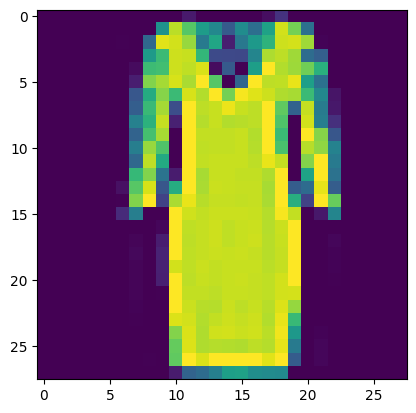

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = 190

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index])

In [7]:
# Normalize the pixel values of the train and test images
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [8]:
# Build the classification model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [9]:
# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


In [10]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4962 - accuracy: 0.8254
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3768 - accuracy: 0.8629
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3355 - accuracy: 0.8770
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3128 - accuracy: 0.8857
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2956 - accuracy: 0.8903


In [11]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3372 - accuracy: 0.8799


[0.33718472719192505, 0.8798999786376953]

In [12]:
classifications = model.predict(test_images)

print(classifications[0])

313/313 [==============================] - 1s 1ms/step
[3.3055815e-07 6.6333548e-08 3.0459862e-08 1.0485962e-09 2.8986612e-08 1.7713772e-02 8.8212538e-08 2.5374159e-02 1.8270613e-06 9.5690966e-01]


In [13]:
print(test_labels[0])

9
